# Comparison of two sets

## Input json format

```
data = {
            "n_photons": Nphotons,
            "overflow": cube_overflow,
            "bins_per_1_cm": bins_per_1_cm,
            "mu_a": mu_a,
            "overflow": overflow,
            "cube": Cube
        }
```

## Load data from json

In [74]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

benchmark = filename_my_100mln_cube

pairs to compare:
1. filename_mati_1mln_cube - filename_my_100mln_cube
2. filename_my_1mln_cube - filename_my_100mln_cube
3. filename_org_1mld_cube - filename_my_100mln_cube

In [75]:
def load_from_file(filename):
    file = open(filename, 'r')
    data = json.load(file)
    file.close()
    return data


filename_my_100mln_cube = "mc456_mc_100mln_my_params_cube.json"
filename_mati_1mln_cube = "mati_1mln_cube.json"
filename_my_1mln_cube = "mc456_mc_1mln_my_params_cube.json"
filename_org_1mld_cube = "mc456_mc_1mld_original_params_cube.json"

my_100mln_cube = load_from_file(filename_my_100mln_cube)
mati_1_mln_cube = load_from_file(filename_mati_1mln_cube)
my_1mln_cube = load_from_file(filename_my_1mln_cube)
org_1mld_cube = load_from_file(filename_org_1mld_cube)

my_100mln_cube['mu_a'] = 0.37
mati_1_mln_cube['mu_a'] = 0.37
my_1mln_cube['mu_a'] = 0.37
org_1mld_cube['mu_a'] = 1.0

In [76]:
all_cubes = [my_100mln_cube, mati_1_mln_cube, my_1mln_cube, org_1mld_cube]
all_cubes_names = ['my_100mln_cube', 'mati_1_mln_cube', 'my_1mln_cube', 'org_1mld_cube']

for cub, name in zip(all_cubes, all_cubes_names):
    cub['name'] = name
    cub['photon_weight'] = 1.0

In [77]:
def cube_list2array(d):
    d['cube'] = np.asarray(d['cube'])


for cub in all_cubes:
    print(type(cub['cube']))
    cube_list2array(cub)
    print(type(cub['cube']))

<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


## Experiment

<img src="../mati_sim/mati_propEnv.png" alt="comparing methods" width="300"/>

Axes are:<br>
*x=red, y=green, z=blue*

## Data statistics

In [78]:
print("shape", all_cubes[0]['cube'].shape)
print("size", all_cubes[0]['cube'].size)

shape (180, 180, 240)
size 7776000


           Name            Sum       Avg             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals
 my_100mln_cube    50933874.54      6.55           0.17           1.12           2.84           5.64      287392.51         215.67       46514.46    49066128.69          50.93      100000000        7776000
mati_1_mln_cube       443541.7      0.06            0.0            0.0           0.02           0.05        3053.54           2.58           6.65       556458.3          44.35        1000000        6191127
   my_1mln_cube      509393.32      0.07            0.0           0.01           0.03           0.06        2882.71           2.16           4.66      490606.74          50.94        1000000        7653406
  org_1mld_cube    864660904.0     111.2            0.0            0.0            0.0            0.0      8299744.0        22942.3   526349310.28    135339096.0          86.47 

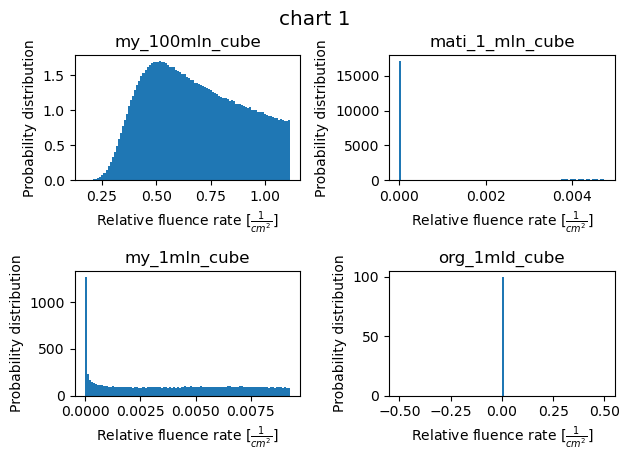

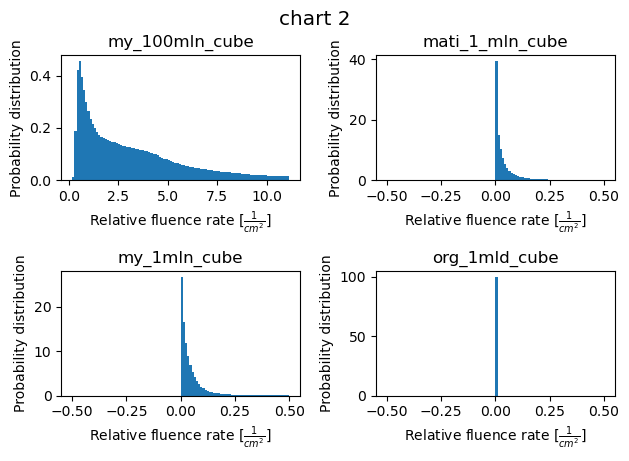

In [79]:
def print_stats(cub_list, cub_arr_list=None):
    print(f"{'Name' : >15}{'Sum' : >15}{'Avg' : >10}{'q0' : >15}{'q0_25' : >15}{'q0_50' : >15}{'q0_75' : >15}{'q1' : >15}{'std' : >15}{'variance' : >15}{'Overflow' : >15}{'perc. in' : >15}{'n_photons' : >15}{'non_zero_vals' : >15}")
    for i in range(len(cub_list)):
        cub = cub_list[i]
        if (cub_arr_list is None):
            cub_arr = cub['cube']
        else:
            cub_arr = cub_arr_list[i]
        n_phot = cub['n_photons']
        ovf = cub['overflow']
        s = cub_arr.sum()
        avg = np.average(cub_arr)
        q0 = np.quantile(cub_arr, q=0.0)
        q0_25 = np.quantile(cub_arr, q=0.25)
        q0_50 = np.quantile(cub_arr, q=0.50)
        q0_75 = np.quantile(cub_arr, q=0.75)
        q1 = np.quantile(cub_arr, q=1.0)
        std = np.std(cub_arr)
        var = np.var(cub_arr)
        perc = s / (s + ovf) * 100
        non_zero_vals = cub_arr.size - np.isclose(cub_arr, 0).sum()
        # to_round = [ovf, s, s2, avg, me, perc]
        ovf = np.round(ovf, 2)
        s = np.round(s, 2)
        avg = np.round(avg, 2)
        q0 = np.round(q0, 2)
        q0_25 = np.round(q0_25, 2)
        q0_50 = np.round(q0_50, 2)
        q0_75 = np.round(q0_75, 2)
        q1 = np.round(q1, 2)
        std = np.round(std, 2)
        var = np.round(var, 2)
        perc = np.round(perc, 2)
        print(f"{cub['name'] : >15}{s : >15}{avg : >10}{q0 : >15}{q0_25 : >15}{q0_50 : >15}{q0_75 : >15}{q1 : >15}{std : >15}{var : >15}{ovf : >15}{perc : >15}{n_phot : >15}{non_zero_vals : >15}")


def histogram(cub_list, cub_arr_list=None, p_min_list=None, p_max_list=None, title="histograms"):
    f,a = plt.subplots(2,2)
    a = a.ravel()
    for i in range(len(cub_list)):
        if (cub_arr_list is None):
            cub_arr = cub_list[i]['cube']
        else:
            cub_arr = cub_arr_list[i]
        hist_bins = 100
        density = True
        # histogram = np.histogram(cub_arr, bins=hist_bins, density=density)
        # print("histogram: ", histogram)

        ax = a[i]
        # min range
        if p_min_list is None:
            p_min = 0.0
        else:
            p_min = p_min_list[i]
        q_min = np.quantile(cub_arr, q=p_min)
        # min range
        if p_max_list is None:
            p_max = 0.25
        else:
            p_max = p_max_list[i]
        q_max = np.quantile(cub_arr, q=p_max)
        # range of histogram
        rng = (q_min, q_max)
        ax.hist(cub_arr.flatten(), range=rng, bins=hist_bins, density=density)
        ax.set_title(cub_list[i]['name'])
        ax.set_xlabel(r"Relative fluence rate [$\frac{1}{cm^2}$]")
        ylabel = "Probability distribution"
        ax.set_ylabel(ylabel)
    st = f.suptitle(title, fontsize="x-large")
    # shift subplots down:
    st.set_y(0.95)
    f.subplots_adjust(top=0.85)
    plt.tight_layout()


def print_more_stats():
    print_stats(all_cubes)
    print()
    i = 1

    # p_min_list = [0.0 for _ in range(4)]
    # p_max_list = [1.0 for _ in range(4)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min range quantiles', p_min_list)
    # print('max range quantiles', p_max_list)
    # histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    # print()

    # p_min_list = [0.25 for _ in range(4)]
    # p_max_list = [1.0 for _ in range(4)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min range quantiles', p_min_list)
    # print('max range quantiles', p_max_list)
    # histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    # print()

    p_min_list = [0.0 for _ in range(4)]
    p_max_list = [0.25 for _ in range(4)]
    title = f'chart {i}'
    print(title)
    i += 1
    print('min range quantiles', p_min_list)
    print('max range quantiles', p_max_list)
    histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    print()

    p_min_list = [0.0 for _ in range(4)]
    p_max_list = [0.9, 0.01, 0.01, 0.001]
    title = f'chart {i}'
    print(title)
    i += 1
    print('min range quantiles', p_min_list)
    print('max range quantiles', p_max_list)
    histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    print()

    # p_min_list = [0.05 for _ in range(4)]
    # p_max_list = [1.0 for _ in range(4)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min range quantiles', p_min_list)
    # print('max range quantiles', p_max_list)
    # histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    # print()

    # p_min_list = [0.05 for _ in range(4)]
    # p_max_list = [0.25 for _ in range(4)]
    # title = f'chart {i}'
    # print(title)
    # i += 1
    # print('min range quantiles', p_min_list)
    # print('max range quantiles', p_max_list)
    # histogram(all_cubes, p_min_list=p_min_list, p_max_list=p_max_list, title=title)
    # print()


print_more_stats()

## Normalization

normalization in *mc321.c*<br>
Fsph = Csph[ir]/Nphotons/shellvolume/mua;
[1/cm2]

In [80]:
def normalization(d):
    # bins_per_1_cm = 120
    # mu_a = 0.37
    # n_photons = 1_000_000
    # val = val * 4.67
    bin_size_in_cm = 1 / d['bins_per_1_cm']
    bin_volume = (bin_size_in_cm)**3
    multi = 1 / (d['n_photons'] * bin_volume * d['mu_a'])
    d['cube'] = d['cube'] * multi
    d['overflow'] = d['overflow'] * multi
    d['photon_weight'] = d['photon_weight'] * multi


for c in all_cubes:
    normalization(c)

print_stats(all_cubes)

           Name            Sum       Avg             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals
 my_100mln_cube      2378749.6      0.31           0.01           0.05           0.13           0.26       13422.01          10.07         101.45     2291520.82          50.93      100000000        7776000
mati_1_mln_cube      2071459.6      0.27            0.0           0.02           0.08           0.22       14260.86          12.04         145.07     2598810.67          44.35        1000000        6191127
   my_1mln_cube     2379004.49      0.31            0.0           0.04           0.12           0.27       13463.06          10.09         101.72     2291266.06          50.94        1000000        7653406
  org_1mld_cube     1494134.04      0.19            0.0            0.0            0.0            0.0       14341.96          39.64        1571.67      233865.96          86.47 

           Name            Sum       Avg             q0          q0_25          q0_50          q0_75             q1            std       variance       Overflow       perc. in      n_photons  non_zero_vals
 my_100mln_cube      2378749.6      0.31           0.01           0.05           0.13           0.26       13422.01          10.07         101.45     2291520.82          50.93      100000000        7776000
mati_1_mln_cube      2071459.6      0.27            0.0           0.02           0.08           0.22       14260.86          12.04         145.07     2598810.67          44.35        1000000        6191127
   my_1mln_cube     2379004.49      0.31            0.0           0.04           0.12           0.27       13463.06          10.09         101.72     2291266.06          50.94        1000000        7653406
  org_1mld_cube     1494134.04      0.19            0.0            0.0            0.0            0.0       14341.96          39.64        1571.67      233865.96          86.47 

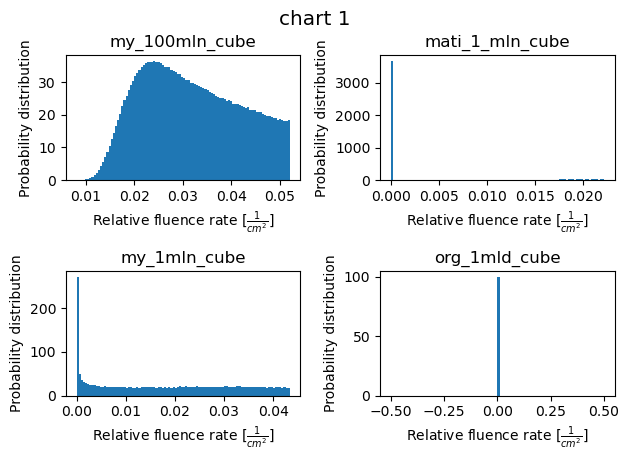

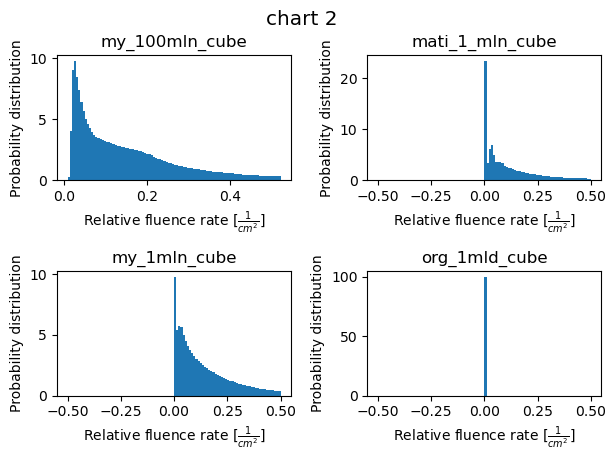

In [81]:
print_more_stats()

## Methods

<!-- <img src="mati_benchmark_methods2.png" alt="comparing methods" width="900"/> -->
<img src="../mati_benchmark_methods2.png" alt="comparing methods" width="900"/>
<!-- ![comparing methods](mati_benchmark_methods2.png) -->

There are 3 ways to compare:
1. 1:1 whole 3D array, element-wise
2. x_high (sum and slices)
3. z_high (sum and slices)

In [120]:
def compare2cubes_universal(cub1, cub2, cub_arr1=None, cub_arr2=None):
    if cub_arr1 is None:
        arr1 = cub1['cube']
    else:
        arr1 = cub_arr1
    if cub_arr2 is None:
        arr2 = cub2['cube']
    else:
        arr2 = cub_arr2

    corr = np.corrcoef(arr1.flatten(), arr2.flatten())
    print("\ncorrelation:\n", corr)

    # ------- flatten data histograms -------
    
    q_val = 0.25
    q1 = np.quantile(arr1, q=q_val)
    q2 = np.quantile(arr2, q=q_val)
    q_use = max(q1, q2)
    bins = 100
    hist1_flat, _ = np.histogram(arr1.flatten(), bins=bins, density=False)
    hist2_flat, _ =np.histogram(arr2.flatten(), bins=bins, density=False)
    # print('hist1_flat', hist1_flat)

    corr_hist_flat = np.corrcoef(hist1_flat, hist2_flat)
    print("\ncorrelation of flatten data histograms:\n", corr_hist_flat)

    # print("\nchisquare of flatten data histograms:")
    # print(chisquare(hist1_flat, hist2_flat))


def corr_table(all_cubes):
    flat_arrs = [c['cube'].flatten() for c in all_cubes]
    print('\ncorrtable of flatten cubes')
    corrtable = np.corrcoef(flat_arrs)
    print(corrtable)

    bins = 100
    hists = [np.histogram(fa.flatten(), bins=bins, density=False)[0] for fa in flat_arrs]
    print('\ncorrtable of histograms')
    corrtable = np.corrcoef(hists)
    print(corrtable)

### 1. 1:1 whole 3D array, element-wise

In [111]:
benchmark = all_cubes[0]
other = all_cubes[1:]

for o in other:
    print("\n==============================================")
    print(f"{o['name']} - BENCHMARK ({benchmark['name']})")
    compare2cubes_universal(o, benchmark)


mati_1_mln_cube - BENCHMARK (my_100mln_cube)

correlation:
 [[1.         0.94554437]
 [0.94554437 1.        ]]

correlation of flatten data histograms:
 [[1. 1.]
 [1. 1.]]

my_1mln_cube - BENCHMARK (my_100mln_cube)

correlation:
 [[1.         0.99991685]
 [0.99991685 1.        ]]

correlation of flatten data histograms:
 [[1. 1.]
 [1. 1.]]

org_1mld_cube - BENCHMARK (my_100mln_cube)

correlation:
 [[1.         0.41482337]
 [0.41482337 1.        ]]

correlation of flatten data histograms:
 [[1. 1.]
 [1. 1.]]


In [121]:
corr_table(all_cubes)


corrtable of flatten cubes
[[1.         0.94554437 0.99991685 0.41482337]
 [0.94554437 1.         0.94546823 0.435218  ]
 [0.99991685 0.94546823 1.         0.41451127]
 [0.41482337 0.435218   0.41451127 1.        ]]

corrtable of histograms
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [ ]:











niegotowe



    chi2
    mutual information
    różnica
        testy_solo(różnica)
    




    

flatten
    testy_solo(każdy)
    compare2arrays(kazdy do benchmarka)
    


histogram 3d





make_frames
show_frames









NOTEBOOK porównywanie dwóch ze sobą
    3 metody z obrazka
        porównać wizualnie
        porównać wartości
        miary statystyczne

    plot czasówek
    plot jak zmieniają się miary wraz z wzrostem photons



### 2. z_high (sum and slices)

### 3. x_high (sum and slices)